## Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing all required libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

### importing a dataset

In [2]:
path= "http://bit.ly/w-data"
df= pd.read_csv(path)
df.head(10)  #To view top 10 entries

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.info()
#This will give us the information about the entries present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.isnull().sum()  #This is used to check whether any null value is present in any column in the dataset

Hours     0
Scores    0
dtype: int64

### Plotting scatter plot to check the relationship between feature and target! 

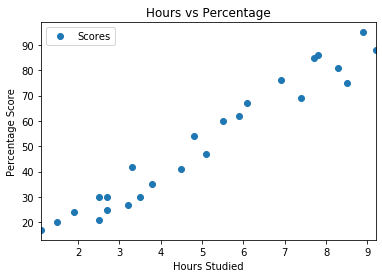

In [12]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### from the above graph we can clearly see the positive linear relatioship between the number of hour studied and the percentage of score.

## Preparing the data 

In [13]:
X= df[['Hours']].values
y=df[['Scores']].values

### Using scikit-learn library to split the dataset into training and testing data

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=42)

## Training the model using linear regression 

In [15]:
from sklearn.linear_model import LinearRegression
lm =  LinearRegression()

lm.fit(xtrain,ytrain) #fitting the model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Scores')

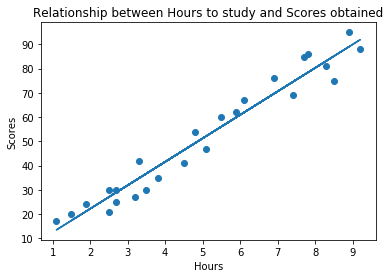

In [18]:
## plotting the regression line

line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

## Predictions

In [20]:
print('Training score : {}'.format(lm.score(xtrain, ytrain)))
print('Test score : {}'.format(lm.score(xtest, ytest)))

Training score : 0.9491209376364417
Test score : 0.9678055545167994


In [24]:
y_test_pred = lm.predict(xtest)

print("actual values : {} ,\npredicted values : {}".format(ytest, y_test_pred))

actual values : [[81]
 [30]
 [21]
 [76]
 [62]] ,
predicted values : [[83.18814104]
 [27.03208774]
 [27.03208774]
 [69.63323162]
 [59.95115347]]


In [25]:
# Now the task is to predicting the model on a Hour of 9.25.

print("No of Hours = ",9.25)
print("Predicted Score = ",lm.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted Score =  92.38611528261494


## As the task given my predicted score is = 92.38611528261494 %

In [28]:
### Now evaluating the model 

from sklearn import metrics  
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest, y_test_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(ytest, y_test_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(ytest, y_test_pred)))

Mean Absolute Error :  3.9207511902099244
Mean Squared Error :  18.943211722315272
Root Mean Squared Error :  4.352380006653288
